### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** Hanyue Zhu
<br>
**Student ID(s):** 1174426



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [29]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
import numpy as np
import matplotlib.pyplot as plt
def preprocess(filename):
    attr = []
    label = []
    total_ins = []
    with open(filename,"r") as f:#Open csv data by using open
        for i in f.readlines()[1:]:
            total_ins.append(i.strip().split(","))#put the data in total_ins list
            attr.append(i.strip().split(",")[:-1])#put the attributes and its values in attr list
            label.append(i.strip().split(",")[-1])#put labels in label list
    f.close()
    
    f_len = len(attr)#find the total instances
    ratio = 0.9 #90-10 splitting
    n = int(ratio*f_len)
    #assign instances into x_train,x_test,y_train,y_test
    x_train = attr[:n]
    y_train = label[:n]
    x_test = attr[n:f_len]
    y_test = label[n:f_len]
    
    return x_train,x_test,y_train,y_test,total_ins,attr,label


In [30]:
# This function should calculat prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model
#find the index of numeric and nominal attributes
def get_num_and_nom_index(f):
    num_index = []
    nom_index = []
    a = []
    b = []
    for i in range(len(f)):
        for j in range(len(f[i])):
            if ((len(f[i][j]) == 1 or len(f[i][j]) == 2) and f[i][j] != " ?"):
                a.append(j)
            else:
                b.append(j)
                
    for k in set(a):
        num_index.append(k)
    for h in set(b):
        nom_index.append(h)
        
    return sorted(num_index),sorted(nom_index)

#find the index of the column of label
def get_label_index(f):
    c1_index = [] #the list used to store index of label  "<=50K"
    c2_index = []#list used to store index of label ">50K"
    for i in range(len(f)):
        if (f[i] == " <=50K"):
            c1_index.append(i)
        else:
            c2_index.append(i)
    
    return c1_index,c2_index

#create the formula of standard deviation 
def sd(mean,attr):
    su = 0
    for i in attr:
        su += (i-mean)**2/(len(attr)-1)
    return np.sqrt(su)

#find the formula of gaussian pdf 
def gaussian_pdf(mean, sd, x):
    return np.log(np.exp((-1/2)*np.square((x-mean)/sd))/(sd*np.sqrt(2*np.pi)))

#a function that helps to find the mean and sd of numeric attributes
def get_mean_sd(x_train,y_train,num_index):
    c1_index,c2_index = get_label_index(y_train)
    
    c1_mean_list = []
    c2_mean_list = []
    c1_sd_list = []
    c2_sd_list = []
    for i in num_index:
        c1_attr = []
        c2_attr = []
        c1_mean = 0
        c1_sd = 0
        c2_mean = 0
        c2_sd = 0
        for j in c1_index:
            c1_attr.append(int(x_train[j][i]))#numeric attributes with label c1(" <=50K")
        c1_mean = np.mean(c1_attr)
        c1_sd = sd(c1_mean,c1_attr)
        for k in c2_index:
            c2_attr.append(int(x_train[k][i]))#numeric attributes with label c2
        c2_mean = np.mean(c2_attr)
        c2_sd = sd(c2_mean,c2_attr)
        
        #use lists to store means and sd
        c1_mean_list.append(c1_mean)
        c2_mean_list.append(c2_mean)
        c1_sd_list.append(c1_sd)
        c2_sd_list.append(c2_sd)
    
    c1_list = []
    c2_list = []
    c1_list.append((c1_mean_list,c1_sd_list))
    c2_list.append((c2_mean_list,c2_sd_list))
                
    return c1_list,c2_list

# find the attribute values of each attributes
def get_attr_freq(x_train,nom_index):
    
    attr_list = []
    for i in nom_index: 
        attr_value = []

        for j in range(len(x_train)):
            attr_value.append(x_train[j][i])
            
        attr_list.append(list(set(attr_value)))#use a list to store the attribute values
        
    return attr_list

#find the likelihood of each 
def get_likelihood(x_train,y_train,nom_index):
        
    c1_index,c2_index = get_label_index(y_train)
    attr_list = get_attr_freq(x_train,nom_index)
        
    c1_lld_list = []
    c2_lld_list = []
    parameter_list = []
    for i in range(len(nom_index)):
        a = []
        b = []
        c = []
        d = []
        n = []
        m = []
        for j in c1_index:
            a.append(x_train[j][nom_index[i]])#list a is used to collect the nominal attributes instances with label c1
        for p in c2_index:
            b.append(x_train[p][nom_index[i]])#list a is used to collect the nominal attributes instances with label c2
        for k in attr_list[i]:
            count1 = 0
            for p in a:  # count the frequences of attribute value of each nominal attributes with label c1
                if (k==p):
                    count1 += 1
            c.append(count1)
        for s in c:# add 1 laplace smoothing is used to deal with 0 probability
            d.append(np.log((s+1)/(len(c1_index)+len(attr_list[i]))))
        c1_lld_list.append(d)
        
        for f in attr_list[i]:
            count2 = 0
            for s in b: # count the frequences of attribute value of each nominal attributes with label c2
                if (f==s):
                    count2 += 1
            n.append(count2)
        for e in n:# add 1 laplace smoothing is used to deal with 0 probability
            m.append(np.log((e+1)/(len(c2_index)+len(attr_list[i]))))
        c2_lld_list.append(m)
    
    return c1_lld_list,c2_lld_list,attr_list


def train(x_train,y_train):
    c1_index,c2_index = get_label_index(y_train)
    prior = []
    c1_prior = np.log(len(c1_index)/len(y_train))
    c2_prior = np.log(len(c2_index)/len(y_train))
    prior.append((c1_prior,c2_prior))
    
    num_index,nom_index=get_num_and_nom_index(x_train)
    
    c1_list,c2_list = get_mean_sd(x_train,y_train,num_index)
    c1_lld_list,c2_lld_list,attr_list = get_likelihood(x_train,y_train,nom_index)

    return prior,c1_list,c2_list,c1_lld_list,c2_lld_list

# a function used to find the sum guassian likelihood of each numeric instance
def sum_gaussian_pdf(test_data,c1_list,c2_list):
    
    num_test_index,nom_test_index = get_num_and_nom_index(test_data)#columns
    
    c1_lld = 0
    c2_lld = 0
    c1_test_list = [] 
    c2_test_list = []
    attr_value1 = 0
    for i in range(len(test_data)):
        c1_lld = 0
        for j in range(len(num_test_index)):
            mean1 = c1_list[0][0][j]
            sd1 = c1_list[0][1][j]
            #find the sum gaussian likelihood of numeric instances with label c1
            c1_lld += gaussian_pdf(mean1,sd1,int(test_data[i][num_test_index[j]]))
            
        c1_test_list.append(c1_lld)
    for i in range(len(test_data)):
        c2_lld = 0
        for j in range(len(num_test_index)):
            mean2 = c2_list[0][0][j]
            sd2 = c2_list[0][1][j]
            #find the sum gaussian likelihood of numeric instances with label c2
            c2_lld += gaussian_pdf(mean2,sd2,int(test_data[i][num_test_index[j]]))
            
        c2_test_list.append(c2_lld)
        
    return c1_test_list,c2_test_list

# a function used to find the sum likelihood of each nominal instance
def sum_likelihood(test_data,c1_lld_list,c2_lld_list):
    
    #find the numeric index and nominal index of test data
    num_test_index,nom_test_index = get_num_and_nom_index(test_data)
    c1_lld_list,c2_lld_list,attr_list = get_likelihood(x_train,y_train,nom_index)
    
    c1_lld = 0
    c2_lld = 0
    c1 = []
    c2 = []
    a = []
    b = []
    c1_nom_list = []
    c2_nom_list = []
  
    for i in range(len(test_data)): 
        c1_lld = 0
        c2_lld = 0
        for j in range(len(nom_test_index)):
            r = test_data[i][nom_test_index[j]]#the nominal attribute value of each instance of the test data
            if (r in attr_list[j]):#check whether the attribute value of test data is exist in x train data
                h = attr_list[j].index(r)
                c1_lld += c1_lld_list[j][h]
                c2_lld += c2_lld_list[j][h]
        #find the likelihood of each nominal instance of test data and store them in lists
        c1_nom_list.append(c1_lld)
        c2_nom_list.append(c2_lld)
        
    return c1_nom_list,c2_nom_list
        
        

In [31]:
# This function should predict classes for new items in the testing data
def predict(x_test,y_train):
    #a list used to store the predicted label of x_test
    predicted_label = []
    c_hat = []#a list used to collect the higher posterior of each instance of x_test
    #find the log prior probability of c1 and c2
    c1_prior = prior[0][0]
    c2_prior = prior[0][1]
    
    #find c1 sum gaussian likelihood and c2 sum gaussian likelihood
    c1_numeric_lld,c2_numeric_lld = sum_gaussian_pdf(x_test,c1_list,c2_list)
    #find c1 sum likelihood and c2 sum likelihood
    c1_nominal_lld,c2_nominal_lld = sum_likelihood(x_test,c1_lld_list,c2_lld_list)
    
    #use 2 lists to store the posterior probabilities of c1 and c2
    list1 = []
    list2 = []
    
    for i in range(len(x_test)):
        c1_posterior = c1_prior+c1_numeric_lld[i]+c1_nominal_lld[i]
        list1.append(c1_posterior)
        c2_posterior = c2_prior+c2_numeric_lld[i]+c2_nominal_lld[i]
        list2.append(c2_posterior)
    for j in range(len(x_test)):
        #compare the c1 posterior and c2 posterior ,find the higher posterior and store its label in predicted_label list
        if (list1[j] < list2[j]):
            predicted_label.append(" >50K")
        else:
            predicted_label.append(" <=50K")
            
        #use "max" to find the higher posterior and collect it in list c_hat
        c_hat.append(max(list1[j],list2[j]))
        
    
    return predicted_label,c_hat,list1,list2


In [32]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.

def evaluate(predicted_label,y_test):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    #find the TP,TN,FP,FN
    for i in range(len(y_test)):
        if (predicted_label[i]==" <=50K" and y_test[i]==" <=50K"):
            TP += 1
        elif (predicted_label[i]==" >50K" and y_test[i]==" >50K"):
            TN += 1
        elif (predicted_label[i]==" <=50K" and y_test[i]==" >50K"):
            FP += 1
        else:
            FN += 1
    #find the accuracy and confusion and f-score
    accuracy = (TP+TN)/len(y_test)
    k = []
    p = []
    t = []
    k.append(TP)
    k.append(FN)
    p.append(FP)
    p.append(TN)
    t.append(k)
    t.append(p)
    matrix = t
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = (2*precision*recall)/(precision+recall)
    
    return accuracy,matrix,f1
    

In [33]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation results. [0.33 marks]



# First, read in the data and apply your NB model to the ADULT data
x_train,x_test,y_train,y_test,total_ins,attr,label= preprocess("adult.csv")
num_index,nom_index = get_num_and_nom_index(x_train)
c1_index,c2_index = get_label_index(y_train)
prior,c1_list,c2_list,c1_lld_list,c2_lld_list = train(x_train,y_train)
attr_list = get_attr_freq(x_train,nom_index)
predicted_label,c_hat,list1,list2= predict(x_test,y_train)


# Second, print the full evaluation results from the evaluate() function
accuracy,matrix,f1 = evaluate(predicted_label,y_test)
print("accuracy: ",accuracy)
print("f1-score: ",f1)
print("confusion matrix: ",matrix)
print("                   ")



# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("Attribute vectors of instances [0, 1, 2]: ", x_train[0:3]) # of the first three records in adult.csv

print("\nNumber of instances (N): ", len(total_ins))
print("Number of attributes (F): ", len(attr[0]))
print("Number of labels (L): ", len(set(label)))


# print out the prediction results of the last three instances
print("\n\nPredicted class log-probabilities for instance N-3: <=50K:",list1[-3],", "," >50K:",list2[-3])
print("Predicted class ID for instance N-3: ", predicted_label[-3])
print("\nPredicted class log-probabilities for instance N-2: <=50K:",list1[-2],", "," >50K:",list2[-2])
print("Predicted class ID for instance N-2: ", predicted_label[-2])
print("\nPredicted class log-probabilities for instance N-1: <=50K:",list1[-1],", "," >50K:",list2[-1])
print("Predicted class ID for instance N-1: ", predicted_label[-1])



accuracy:  0.86
f1-score:  0.9078947368421053
confusion matrix:  [[69, 8], [6, 17]]
                   
Attribute vectors of instances [0, 1, 2]:  [['68', ' ?', ' 1st-4th', '2', ' Divorced', ' ?', ' Not-in-family', ' White', ' Female', '20', ' United-States'], ['39', ' State-gov', ' Bachelors', '13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', '40', ' United-States'], ['50', ' Self-emp-not-inc', ' Bachelors', '13', ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', '13', ' United-States']]

Number of instances (N):  1000
Number of attributes (F):  11
Number of labels (L):  2


Predicted class log-probabilities for instance N-3: <=50K: -20.768165488458923 ,   >50K: -19.762177925498445
Predicted class ID for instance N-3:   >50K

Predicted class log-probabilities for instance N-2: <=50K: -25.310387321914632 ,   >50K: -22.803496285083618
Predicted class ID for instance N-2:   >50K

Predicted class log-probabilities for instance N-1: <=50K

## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

accuracy:  0.86
f1-score:  0.9078947368421053
confusion matric:  [[69, 8], [6, 17]]
sensitivity:  0.8961038961038961
specificity:  0.7391304347826086


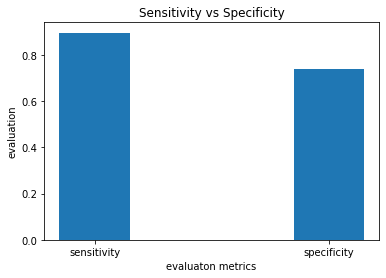

In [34]:
# Write additional code here, if necessary (you may insert additional code cells)
import matplotlib
import matplotlib.pyplot as plt
accuracy,matrix,f1=evaluate(predicted_label,y_test)
print("accuracy: ",accuracy)
print("f1-score: ",f1)
print("confusion matric: ",matrix)

TP = matrix[0][0]
FN = matrix[0][1]
FP = matrix[1][0]
TN = matrix[1][1]


sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("sensitivity: ",sensitivity)
print("specificity: ",specificity)
x = []
x.append("sensitivity")
x.append("specificity")
y=[]
y.append(sensitivity)
y.append(specificity)
#use a bar plot to show the difference between sensitivity and specificity
plt.title("Sensitivity vs Specificity")
plt.xlabel("evaluaton metrics")
plt.ylabel("evaluation")
plt.bar(x,y,width=0.3)
plt.show()

Provide your text answer of 150-200 words in this cell.

The code and the histogram clearly show that sencitivity which value is 0.89614 is higher than specificity with value of 0.739134.Higher sencitivity means the model has a good and significant prediction effect for positive("<=50K") instances, and a moderate prediction effect for negative(">50K") instances.In addition,
sensitivity is TP/(TP+FN) and represents how many of the actual positive instances are found by the model and specificity is TN/(TN+FP) and represents how many of the actual negative instances are found by the model.There are two possible reasons for sensitivity higher than specificity. First, the data distribution is extremely uneven. In the process of processing data, it is not difficult to find that the number of instances with label "<=50K" is much more than the number of instances with label ">50K". This causes the model to tend to predict an instance as positive("<=50K"), which means that an instance is more likely to be predicted as positive("<=50K"). The majority of instances with positive labels will result in a much higher priority probability than negative ones. And this is likely to make TP larger and TN smaller, and TP will be less affected by FN than TN by FP. Therefore sencitivity is higher than specificity. Second, since there is a missing value in the data itself, different processing methods for missing value and 0 probability will also affect the final result.

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

0.85
KDE accuracy:  0.85
KDE f1 score:  0.9006622516556292
KDE confusion matrix:  [[68, 9], [6, 17]]
0.8961038961038961
0.7391304347826086


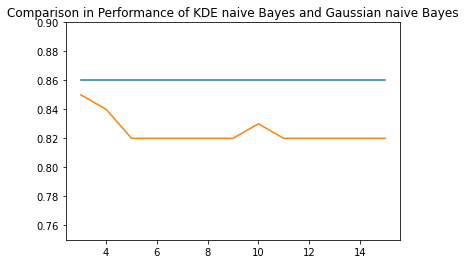

In [35]:
# Write additional code here, if necessary (you may insert additional code cells)
#Q2(a)
def gaussian(x,xi,bandwidth):
    return np.exp((-1/2)*(np.square((x-xi)/bandwidth)))/(bandwidth*np.sqrt(2*np.pi))
#define the KDE pdf
def KDE_pdf(x,c_attr,bandwidth):
    KDE_lld = []
    for i in range(len(c_attr)):
        xi = c_attr[i]
        KDE_lld.append(gaussian(x,xi,bandwidth))
        
    return np.log(np.mean(KDE_lld))

#a function used to find the KDE likelihood of each numeric instance
def get_KDE_likelihood(x_train,x_test,y_train,bandwidth):
    
    c1_attr = []
    c2_attr = []
    value1 = 0
    value2 = 0
    
    c1_KDE_list = []
    c2_KDE_list = []    
    
    for h in range(len(x_test)):
        c1_lld = []
        c2_lld = []
        for i in range(len(num_index)):
            c1_attr = []
            c2_attr = []
            for j in c1_index:
                value1 = x_train[j][num_index[i]]#attribute value with label c1
                c1_attr.append(int(value1))
            for k in c2_index:
                value2 = x_train[k][num_index[i]]#attribute value with label c2
                c2_attr.append(int(value2))
            
            x = int(x_test[h][num_index[i]])#the numeric attribute values of x_test
            #assign the values to function KDE_pdf to get the KDE likelihood of each label
            c1_lld.append(KDE_pdf(x,c1_attr,bandwidth))
            c2_lld.append(KDE_pdf(x,c2_attr,bandwidth))
            
        c1_KDE_list.append(c1_lld)
        c2_KDE_list.append(c2_lld)
    
    return c1_KDE_list,c2_KDE_list


def KDE_train(x_train,x_test,y_train,bandwidth):
    
    c1_index,c2_index = get_label_index(y_train)
    
    num_index,nom_index =get_num_and_nom_index(x_train)
    
    c1_list,c2_list = get_KDE_likelihood(x_train,x_test,y_train,bandwidth)
    c1_lld_list,c2_lld_list,attr_list = get_likelihood(x_train,y_train,nom_index)
    
    return c1_list,c2_list,c1_lld_list,c2_lld_list


#a function was created to find the sum KDE likelihood of each test numeric instance
def sum_KDE_lld(x_test,x_train,y_train,bandwidth):
    c1_KDE_list,c2_KDE_list = get_KDE_likelihood(x_train,x_test,y_train,bandwidth)
    c1_KDE_lld = []
    c2_KDE_lld = []
    for i in range(len(c1_KDE_list)):
        c1_lld = 0 
        for j in range(len(c1_KDE_list[i])):
            c1_lld += c1_KDE_list[i][j]
        c1_KDE_lld.append(c1_lld)
    for i in range(len(c2_KDE_list)):
        c2_lld = 0 
        for j in range(len(c2_KDE_list[i])):
            c2_lld += c2_KDE_list[i][j]
        c2_KDE_lld.append(c2_lld)
        
    return c1_KDE_lld,c2_KDE_lld

    
#a function used to predict the label of each test instance
def KDE_predict(x_test,prior,bandwidth):
    
    predicted_label2 = []
    c_hat2 = []
    c1_prior = np.log(len(c1_index)/len(y_train))
    c2_prior = np.log(len(c2_index)/len(y_train))
    
    c1_numeric_lld,c2_numeric_lld = sum_KDE_lld(x_test,x_train,y_train,bandwidth)
    c1_nominal_lld,c2_nominal_lld = sum_likelihood(x_test,c1_lld_list,c2_lld_list)
    
    
    list3 = []
    list4 = []
    for i in range(len(x_test)):
        c1_posterior = c1_prior + c1_numeric_lld[i] + c1_nominal_lld[i]
        c2_posterior = c2_prior + c2_numeric_lld[i] + c2_nominal_lld[i]
        list3.append(c1_posterior)
        list4.append(c2_posterior)
         
    for j in range(len(x_test)):
        
        c_hat2.append(max(list3[j],list4[j]))
        
        if (list3[j] < list4[j]):
            predicted_label2.append(" >50K")
        else:
            predicted_label2.append(" <=50K")
            
    return predicted_label2,c_hat2

#a function used to evaluate the method of prediction
def KDE_evaluate(x_train,x_test,y_train,y_test,bandwidth):
    c1_list,c2_list,c1_lld_list,c2_lld_list = KDE_train(x_train,x_test,y_train,bandwidth)
    predicted_label2,c_hat2 =  KDE_predict(x_test,prior,bandwidth)
    
    return evaluate(predicted_label2,y_test)


predicted_label2,c_hat2 = KDE_predict(x_test,prior,3)
accuracy_kde,matrix_kde,f1_kde = evaluate(predicted_label2,y_test)
print(evaluate(predicted_label2,y_test)[0])
print("KDE accuracy: ",accuracy_kde)
print("KDE f1 score: ",f1_kde)
print("KDE confusion matrix: ",matrix_kde)

TP = matrix[0][0]
FN = matrix[0][1]
FP = matrix[1][0]
TN = matrix[1][1]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print(sensitivity)
print(specificity)

KDE_accur_list = []
GN_accur_list = []
bandwidth_list = []
for i in range(3,16):
    bandwidth_list.append(i)
    KDE_accur_list.append(KDE_evaluate(x_train,x_test,y_train,y_test,i)[0])
    GN_accur_list.append(evaluate(predicted_label,y_test)[0])
       
plt.plot(bandwidth_list,GN_accur_list)
plt.plot(bandwidth_list,KDE_accur_list)
plt.ylim(0.75,0.90)
plt.title("Comparison in Performance of KDE naive Bayes and Gaussian naive Bayes")
plt.show()

Accuracy list of 10-fold Cross Validation: [0.83, 0.83, 0.8, 0.86, 0.88, 0.82, 0.82, 0.76, 0.83, 0.86]
 
Recall list of 10-fold Cross Validation: [0.8133333333333334, 0.8205128205128205, 0.8311688311688312, 0.8701298701298701, 0.925, 0.8354430379746836, 0.8701298701298701, 0.8289473684210527, 0.8767123287671232, 0.8961038961038961]
 
Specificity list of 10-fold Cross Validation: [0.88, 0.8636363636363636, 0.6956521739130435, 0.8260869565217391, 0.7, 0.7619047619047619, 0.6521739130434783, 0.5416666666666666, 0.7037037037037037, 0.7391304347826086]
 
Accuracy list of 2-fold Cross Validation: [0.84, 0.818]
Recall list of 2-fold Cross Validation: [0.8527131782945736, 0.8612565445026178]
Specificity list of 2-fold Cross Validation: [0.7964601769911505, 0.6779661016949152]
For 10-fold CV: the average accuracy: 0.8290000000000001 the average recall: 0.8567481356541482 the average specificity: 0.7363954974172364
 
For 2-fold CV: the average accuracy: 0.829 the average recall: 0.85698486139859

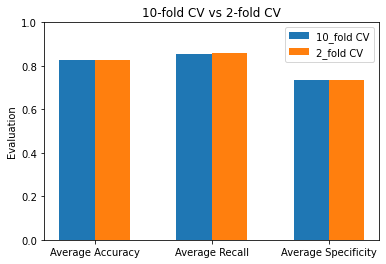

[]

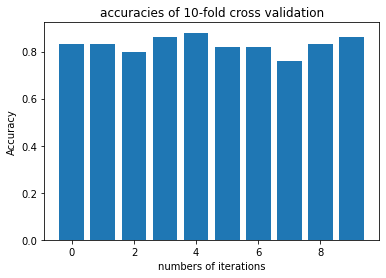

In [36]:
#Q2(b)
#define a function to find the index of train data
def find_train_index(index_list,train_list):
    train_index = []
    for i in index_list:
        for j in range(len(train_list)):
            if (i == j):
                train_list.remove(j)
                
    train_index = train_list
    return train_index

#a function helps splitting the data 
def get_data_list(index_list,a_list):
    data_list = []
    for i in index_list:
        data_list.append(a_list[i])
    return data_list

#a function used to split the full dataset and use the method of cross validation
def k_fold_cv(k,filename):

    attribute_list = []
    label_list = []
    with open(filename,"r") as f:#read and open the file 
        for i in f.readlines()[1:]:
            attribute_list.append(i.strip().split(",")[:-1])
            label_list.append(i.strip().split(",")[-1]) 
        
    f.close()
    #calculate the length of the data before splitting
    f_len = len(attr)
    #define the split ration
    ratio = 1/k
    n = int(ratio*f_len)
    accur_list = []
    recall_list = []
    specificity_list = []
    
    train_index = []
    #use a for loop to iterate the value of k
    for i in range(k):
        #find the index of train and test
        train_list = list(range(f_len))
        test_index = list(range(n*i,n*(i+1)))
        train_index = find_train_index(test_index,train_list)
        
        x_test = get_data_list(test_index,attribute_list)
        y_test = get_data_list(test_index,label_list)
        x_train = get_data_list(train_index,attribute_list)
        y_train = get_data_list(train_index,label_list)
        
        prior,c1_list,c2_list,c1_lld_list,c2_lld_list = train(x_train,y_train)
        predicted_label3,c_hat3,list5,list6= predict(x_test,y_train)
        accuracy,recall,specificity = cv_evaluate(predicted_label3,y_test)
        accur_list.append(accuracy)
        recall_list.append(recall)
        specificity_list.append(specificity)
    
    return accur_list,recall_list,specificity_list

#a function used to evaluate cross validation
def cv_evaluate(predicted_label,y_test):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(y_test)):
        if (predicted_label[i] == " <=50K" and y_test[i] == " <=50K"):
            TP += 1
        elif (predicted_label[i] == " >50K" and y_test[i] == " >50K"):
            TN += 1
        elif (predicted_label[i]== " <=50K" and y_test[i] == " >50K"):
            FP += 1
        else:
            FN += 1
    #find the accuracy,recall and specificity
    accuracy = (TP+TN)/(len(y_test))
    recall = TP/(TP+FN)
    specificity = TN/(TN+FP)
    
    return accuracy,recall,specificity
        

accur_list_10,recall_list_10,specificity_list_10 =k_fold_cv(10,"adult.csv")
accur_list_2,recall_list_2,specificity_list_2 = k_fold_cv(2,"adult.csv")
print("Accuracy list of 10-fold Cross Validation:",k_fold_cv(10,"adult.csv")[0])
print(" ")
print("Recall list of 10-fold Cross Validation:",k_fold_cv(10,"adult.csv")[1])
print(" ")
print("Specificity list of 10-fold Cross Validation:",k_fold_cv(10,"adult.csv")[2])
print(" ")
print("Accuracy list of 2-fold Cross Validation:",accur_list_2)
print("Recall list of 2-fold Cross Validation:",recall_list_2)
print("Specificity list of 2-fold Cross Validation:",specificity_list_2)

avg_10_fold_accur = np.mean(accur_list_10)
avg_2_fold_accur = np.mean(accur_list_2)
avg_10_fold_recall = np.mean(recall_list_10)
avg_2_fold_recall = np.mean(recall_list_2)
avg_10_fold_spec = np.mean(specificity_list_10)
avg_2_fold_spec = np.mean(specificity_list_2)

print("For 10-fold CV:","the average accuracy:",avg_10_fold_accur,"the average recall:",avg_10_fold_recall,"the average specificity:",avg_10_fold_spec)
print(" ")
print("For 2-fold CV:","the average accuracy:",avg_2_fold_accur,"the average recall:",avg_2_fold_recall,"the average specificity:",avg_2_fold_spec)

aters = ("Average Accuracy","Average Recall","Average Specificity")
list_10 = [avg_10_fold_accur,avg_10_fold_recall,avg_10_fold_spec]
list_2 = [avg_2_fold_accur,avg_2_fold_recall,avg_2_fold_spec]
bar_width = 0.3
index_10 = np.arange(len(aters))
index_2 = index_10 + bar_width

plt.bar(index_10,height=list_10,width=bar_width,label = "10_fold CV")
plt.bar(index_2,height=list_2,width=bar_width,label="2_fold CV")
plt.legend()
plt.xticks(index_10 + bar_width/2,aters)
plt.ylabel("Evaluation")
plt.ylim(0,1)
plt.title("10-fold CV vs 2-fold CV")
plt.show()

plt.bar(list(range(10)),accur_list_10)
plt.title("accuracies of 10-fold cross validation")
plt.xlabel("numbers of iterations")
plt.ylabel("Accuracy")
plt.plot()



Provide your text answer of 150-200 words in this cell.


Q2(a):
The graph in Q2(a) compares the performance of KDE naive Bayes and Gaussian naive Bayes.It clearly shows that KDE naive Bayes is significantly affected by the value of bandwidth and Gaussian naive Bayes keeps constant.This means choose a different value of bandwidth results in a different shape of the resulting pdf.In addition,from the graph we can find that the accuracy of kde is generally lower than that of Gaussian. When the bandwidth is in the range of 1 to 3, the accuracy of kde is similar to that of gaussian, and the accuracy of kde decreases as the bandwidth goes on.In my opinion,I think Gaussian naive Bayes is more suitable to model likelihood because the parameter bandwidth of KDE is full of too much randomness and instability. On the contrary, Gaussian is not affected by parameters and the accuracy is stable and high.



Q2(b):
The second graph compares the accuracies of the changing values of m in m-fold croos validations.From the bar plot,it follows that accuracies of 10-fold are around 0.8 and when the number of iterations around 5 and 7 the accuracy becomes lower.Moreover,the operation speed of 2-fold cross validation is faster than that of 10-fold.From the accuracy list,recall list and specificity list of 10-fold,we can observe the changes in accuracy and recall are not very large compared to specificity which has obvious fluctuations on the bar plot.The same goes for 2-fold. Specificity is significantly lower than accuracy and recall and around 0.7 and 0.6.Then,there are six bars in the bar plot which compares 10-fold and 2-fold cross validation.The height of each pair of bars is very similar.The first two bars compare the average accuracy of 2-fold and 10-fold and it shows that the average accuracy of 10-fold is slightly higher than that of 2-fold.The secong 2 bars which compare the average recall and the third 2 bars which compare the average specificity demonstrate that the average recall and specificity of 10-fold and 2-fold are quite similar.In conclusion,the larger m is, the more training data is used each time, the more general the trained model is, and the more reliable the data obtained. But at the same time the speed will be slower.


### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

In [6]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Hanyue Zhu]
   
   <b>Dated</b>: [2022/4/8]